In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [25]:
ratingsDf = pd.read_csv('final_dataset.csv')
ratingsDf = ratingsDf.drop(['Unnamed: 0'], axis=1)
ratingsDf = ratingsDf.rename(columns={"mpaa rating":"mpaa_rating"})
ratingsDf

,title,country,date_added,release_year,mpaa_rating,duration,listed_in,description,user_rating
0,Limitless,United States,"July 1, 2016",2016,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy",A failed musician unleashes his brain's full p...,84.000000
1,Gilmore Girls: A Year in the Life,United States,"November 25, 2016",2016,TV-14,1 Season,"TV Comedies, TV Dramas, Teen TV Shows",Set nearly a decade after the finale of the or...,77.000000
2,Charmed,United States,"October 1, 2017",2005,TV-PG,8 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",After a trio of sisters discover an ancient te...,90.000000
3,Revenge,NaN,"May 2, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a mother and her daughter are gang-raped...,84.000000
4,The Jungle Book,"India, Germany, France","May 11, 2019",2010,TV-Y7,1 Season,Kids' TV,This animated series follows young Mowgli and ...,97.000000
5,American Crime Story: The People v. O.J. Simpson,United States,"March 6, 2019",2016,TV-MA,1 Season,"Crime TV Shows, TV Dramas",This anthology series dramatizes historic crim...,79.000000
6,Dave Chappelle,United States,"March 21, 2017",2017,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy icon Dave Chappelle makes his triumphan...,94.000000
7,Cheer Squad,United States,"March 14, 2017",2016,TV-PG,1 Season,"Reality TV, Teen TV Shows","Follow the Great White Sharks, a world-champio...",61.000000
8,Barbie Life in the Dreamhouse,United States,"July 1, 2017",2012,TV-G,1 Season,"Kids' TV, TV Comedies",Join blond icon Barbie and her fabulous friend...,85.000000
9,DreamWorks Shrek's Swamp Stories,United States,"August 17, 2012",2008,TV-PG,1 Season,"Kids' TV, TV Action & Adventure, TV Comedies","Shrek celebrates Halloween, Puss in Boots is c...",56.000000


In [41]:
mpaa_ratings = ['TV-14', 'TV-PG', 'TV-MA', 'TV-Y7', 'TV-G', 'TV-Y', 'TV-Y7-FV']
mpaa_dict = []

mpaa_df = pd.DataFrame({'MPAA_Rating':mpaa_ratings})
mpaa_groups = ratingsDf.groupby('mpaa_rating')
final_df = pd.DataFrame(columns = ['MPAA_Rating', 'User_Rating'])

for mpaa_rating in mpaa_ratings:
    currRow = [mpaa_rating, round(mpaa_groups.get_group(mpaa_rating)['user_rating'].mean())]
    final_df = final_df.append(pd.Series(currRow, index=df.columns), ignore_index=True)

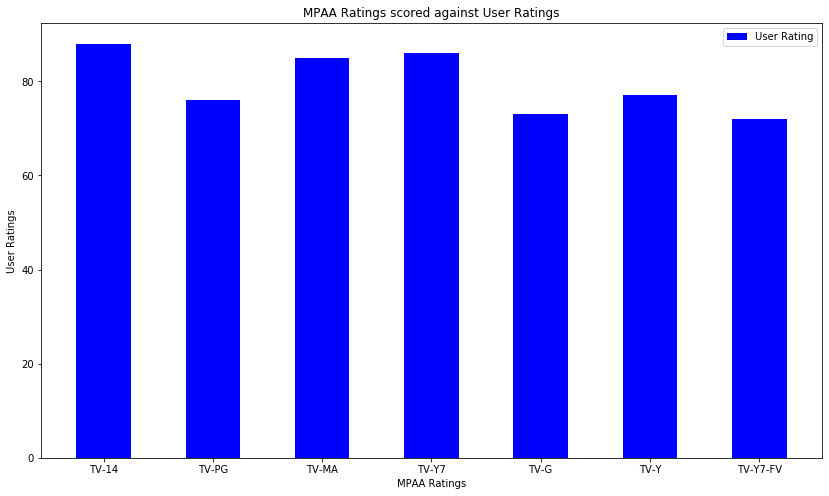

In [54]:
# w = 0.5
label_locations = np.arange(final_df.shape[0])

plt.bar(label_locations, final_df['User_Rating'], width=w, label='User Rating', color='blue')
plt.gcf().set_size_inches(14, 8)
plt.title('MPAA Ratings scored against User Ratings')
plt.xlabel('MPAA Ratings')
plt.ylabel('User Ratings')
plt.xticks(label_locations, labels=mpaa_ratings)
plt.legend()
plt.show()